In [22]:
import statistics
import numpy as np
from PIL import Image
import cv2
import pandas as pd
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
# Dicecの計算
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice


In [23]:
import os
# ファイル名の先頭部分（prefix）により自動的にファイル名を抽出するアルゴリズム。

""" 

Extracts filenames in directory if they start with the prefix input 


Args/Parameters:

    directory_path (string): The path of the dir (ex: /root/home/Documents/etc)
    
    prefix (string): Prefix of the file name (ex: 'Bo' is a prefix of 'Bone')

Returns:

    sorted_file_names (list of str): File names sorted in ascending order in the dir without extension ex: ['bone1', 'bone2', ...]

Raises:

    SomeError: ...

"""

def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names


In [24]:

#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/1-20250206-Unet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/2-20250205-MCunet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/3-20250208-TransUnet-CRF-HP/fold1/crf")

#unet
# searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108")
# #searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-108-21Dil (MRCNN)")
# #mcunet

# #searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU10821-CustomLoss")
# searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss")
# print(searchdir)



# for icisip
searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2")
searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2")


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
Count1 =  [58012, 1133, 755, 877, 638, 749, 710, 703, 647, 807, 505]
Count2 =  [57875, 1049, 836, 893, 641, 695, 654, 737, 675, 839, 642]
Count3 =  [57563, 1030, 737, 848, 607, 655, 607, 649, 534, 776, 473]
Dice =  [0.9934332582602018, 0.9440879926672777, 0.9264613450659962, 0.9581920903954803, 0.9491790461297889, 0.907202216066482, 0.8900293255131965, 0.9013888888888889, 0.8078668683812406, 0.9428918590522479, 0.8247602441150829, 0.9052059876275682]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
Count1 =  [57863, 1180, 763, 802, 681, 735, 649, 815, 613, 831, 604]
Count2 =  [57875, 1049, 836, 893, 641, 695, 654, 737, 675, 839, 

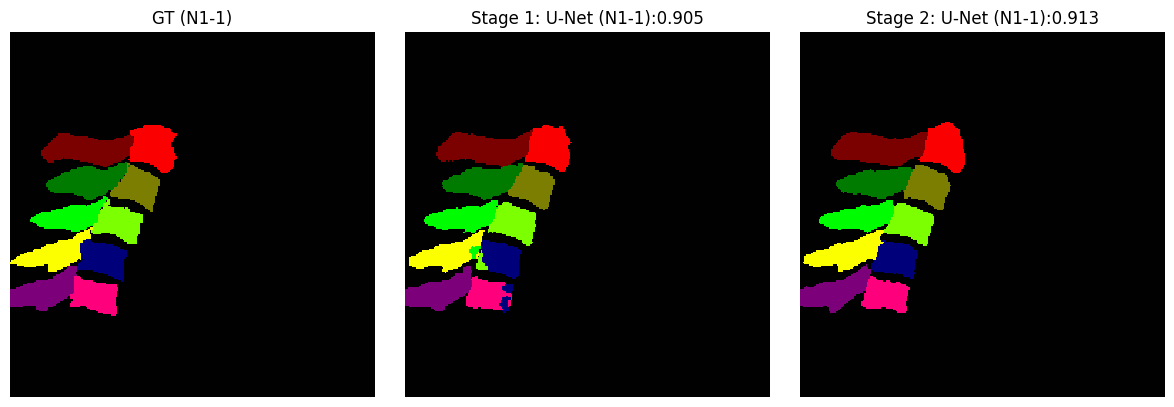

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
image: N1-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-3.png
image: N1-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
image: N1-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-5.png
image: N1-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-Correctio

[ WARN:0@26585.711] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@26585.711] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@26585.711] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@26585.712] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-3.png'): can't open/read file: check file path/integrity
[ WARN:0@26585.712] global loadsave.cpp:248 findDecoder imread_('/home/eric/Document

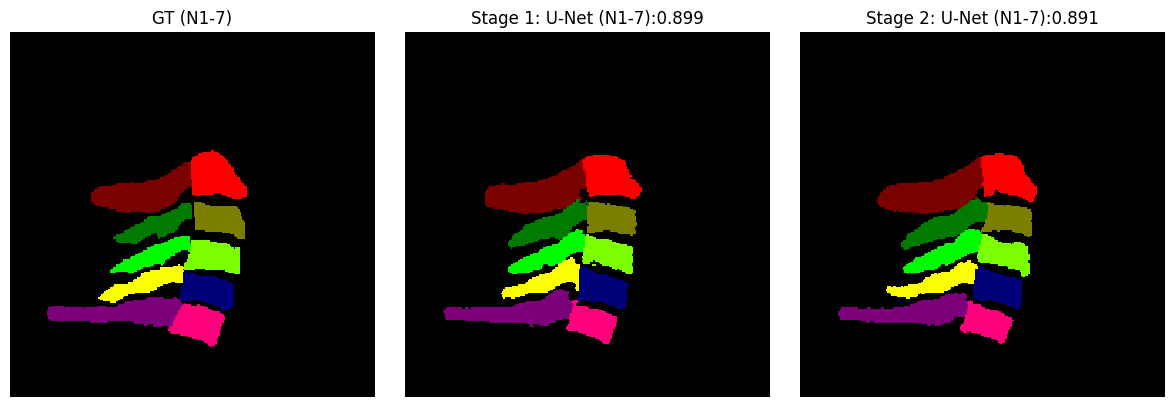

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-8.png
image: N1-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
image: N1-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-10.png
image: N1-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
image: N2-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-Correc

[ WARN:0@26585.897] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@26585.897] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@26585.897] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@26585.898] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N1-9.png'): can't open/read file: check file path/integrity
[ WARN:0@26585.898] global loadsave.cpp:248 findDecoder imread_('/home/eric/Document

Count1 =  [57505, 1159, 621, 789, 481, 752, 474, 826, 853, 1510, 566]
Count2 =  [59201, 1072, 595, 722, 481, 660, 428, 722, 392, 842, 421]
Count3 =  [57157, 1024, 585, 703, 454, 614, 408, 586, 364, 533, 3]
Dice =  [0.9795040529193015, 0.917974002689377, 0.962171052631579, 0.9305095962938451, 0.9438669438669439, 0.8696883852691218, 0.9046563192904656, 0.7571059431524548, 0.5847389558232932, 0.4532312925170068, 0.0060790273556231, 0.733002151888971]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N2-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-3.png
Count1 =  [57931, 1170, 641, 738, 525, 726, 503, 667, 469, 1443, 723]
Count2 =  [59201, 1072, 595, 722, 481, 660, 428, 722, 392, 842, 421]
Count3 =  [57473, 1010, 584, 681, 472, 634, 422, 620, 386, 647, 363]
Dice =  [0.9813372946760919, 0.9009812667261374, 0.9449838187702265, 0.9328767123287671, 0.9383697813121272, 0.9148629148629148, 0.906

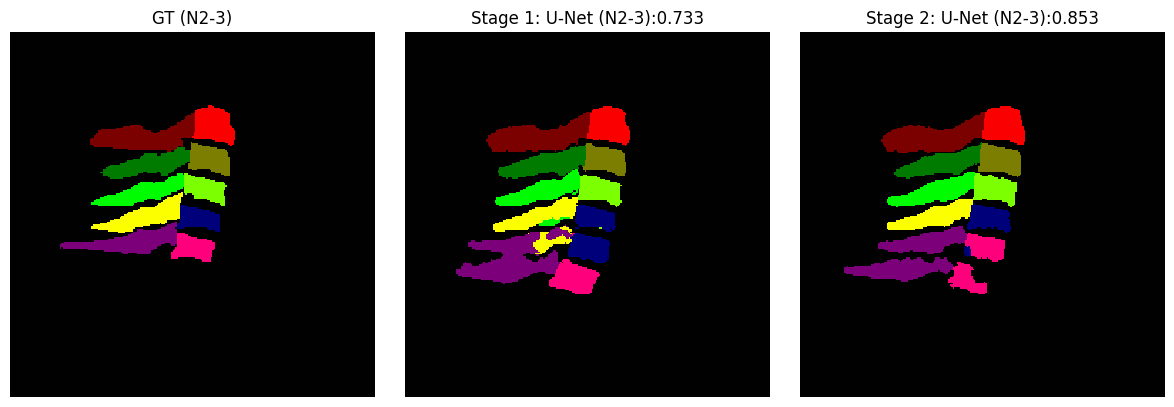

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-4.png
image: N2-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-5.png
image: N2-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-6.png
image: N2-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png


[ WARN:0@26586.079] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.079] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.079] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.080] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-5.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.080] global loadsave.cpp:248 findDecoder imread_('/home/eric/Document

Count1 =  [57633, 1262, 722, 883, 551, 778, 569, 765, 683, 1086, 604]
Count2 =  [58020, 1306, 714, 840, 584, 737, 577, 689, 503, 1036, 530]
Count3 =  [57248, 1221, 678, 815, 540, 697, 543, 645, 483, 967, 376]
Dice =  [0.9899959361192533, 0.9509345794392523, 0.9442896935933147, 0.9460243760882182, 0.9515418502202643, 0.9201320132013201, 0.9476439790575916, 0.8872077028885832, 0.8145025295109612, 0.9114043355325165, 0.6631393298059964, 0.8936820389338018]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png
Count1 =  [57734, 1249, 761, 892, 559, 838, 563, 820, 529, 1062, 529]
Count2 =  [58020, 1306, 714, 840, 584, 737, 577, 689, 503, 1036, 530]
Count3 =  [57276, 1198, 681, 809, 540, 706, 533, 657, 475, 912, 503]
Dice =  [0.9896159096013961, 0.9377690802348336, 0.9233898305084746, 0.9341801385681293, 0.9448818897637795, 0.8965079365079365

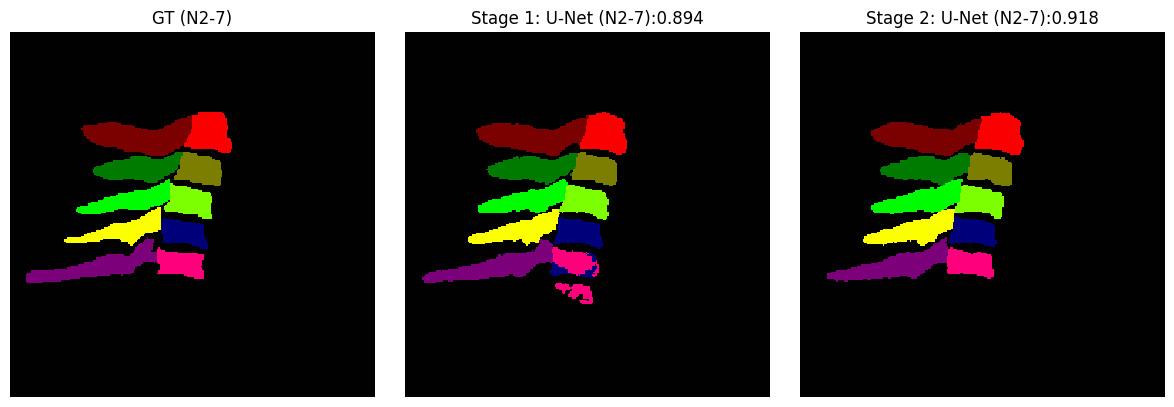

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
Count1 =  [58554, 1128, 754, 732, 518, 692, 498, 728, 475, 961, 496]
Count2 =  [58328, 1033, 676, 750, 516, 796, 573, 869, 523, 950, 522]
Count3 =  [57895, 969, 661, 696, 496, 659, 486, 683, 467, 865, 482]
Dice =  [0.9906572440581098, 0.8968070337806571, 0.9244755244755245, 0.9392712550607287, 0.9593810444874274, 0.885752688172043, 0.907563025210084, 0.8553537883531622, 0.935871743486974, 0.9052851909994767, 0.9469548133595285, 0.9156716107385606]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
Count1 =  [58571, 1170, 721, 717, 514, 737, 502, 734, 483, 922, 465]
Count2 =  [58328, 1033, 676, 750, 516, 796, 573, 869, 523, 950, 522

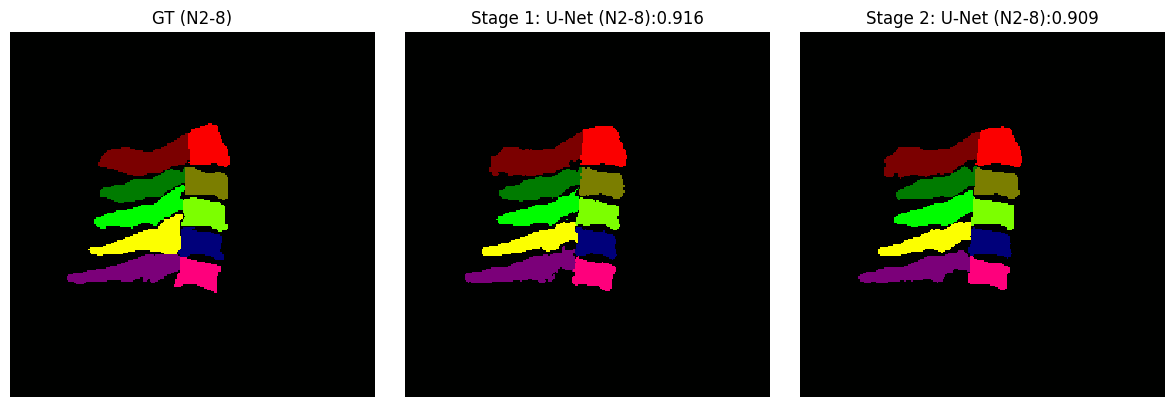

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-9.png
image: N2-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-10.png
image: N2-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-1.png
Count1 =  [58890, 1056, 646, 708, 540, 715, 536, 712, 511, 768, 454]
Count2 =  [59164, 1011, 561, 729, 507, 723, 499, 661, 469, 737, 475]
Count3 =  [58583, 984, 558, 649, 494, 681, 472, 638, 438, 650, 422]
Dice =  [0.9924780185338913, 0.9521044992743106, 0.9246064623032312, 0.9032707028531664, 0.9436485195797517, 0.9471488178025035, 

[ WARN:0@26586.440] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-9.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.440] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N2-9.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.440] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-9.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.441] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N2-10.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.441] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documen

Count1 =  [58672, 1116, 645, 687, 561, 748, 526, 803, 484, 847, 447]
Count2 =  [59164, 1011, 561, 729, 507, 723, 499, 661, 469, 737, 475]
Count3 =  [58363, 995, 550, 613, 499, 675, 454, 643, 403, 678, 410]
Dice =  [0.9905801283139278, 0.9355900329102022, 0.912106135986733, 0.865819209039548, 0.9344569288389513, 0.9177430319510537, 0.8858536585365854, 0.8784153005464481, 0.8457502623294858, 0.8560606060606061, 0.8893709327548807, 0.8921166098954494]


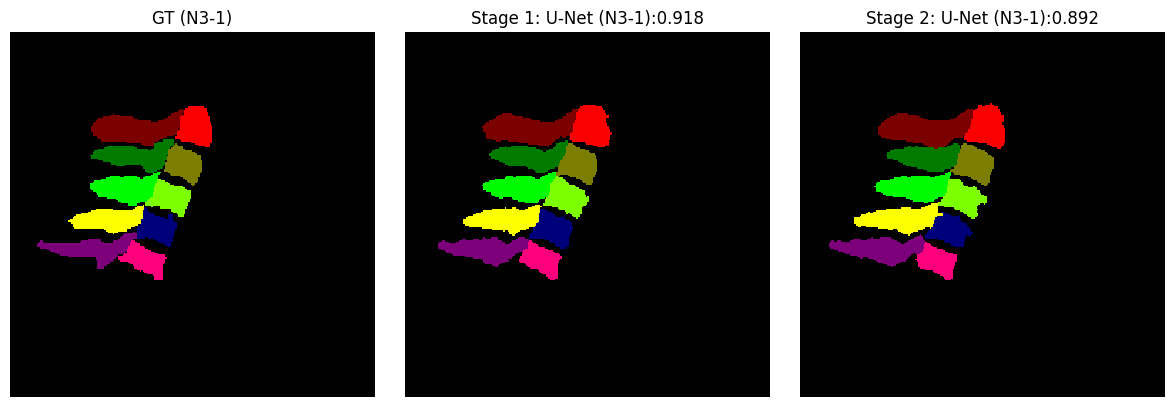

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-2.png
image: N3-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
image: N3-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-4.png
image: N3-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-5.png
Count1 =  [58800, 1095, 693, 710, 473, 665, 500, 597, 523, 960, 520]
Count2 =  [59188, 1005, 678, 692, 419, 65

[ WARN:0@26586.673] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.673] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.673] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.674] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-3.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.674] global loadsave.cpp:248 findDecoder imread_('/home/eric/Document

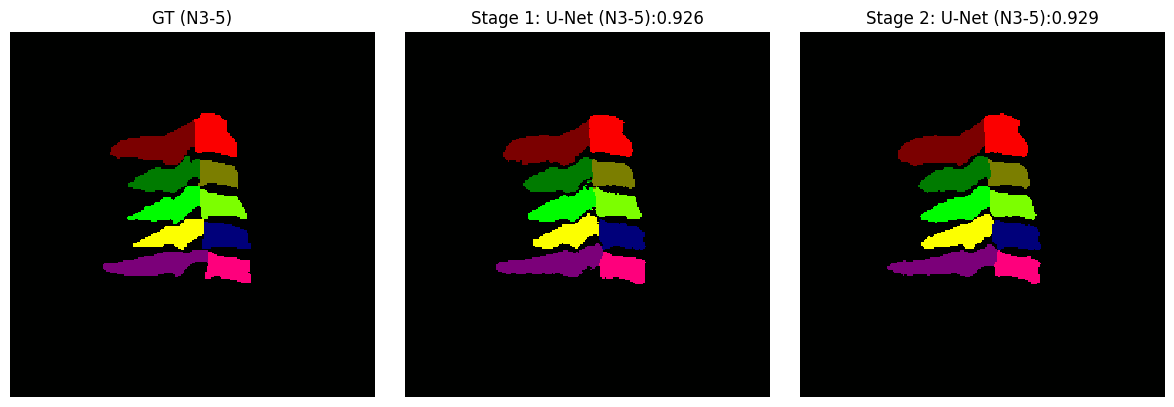

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-6.png
image: N3-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
image: N3-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-8.png
image: N3-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-9.png
image: N3-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-Correctio

[ WARN:0@26586.846] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-6.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.846] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N3-6.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.846] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-6.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.848] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N3-7.png'): can't open/read file: check file path/integrity
[ WARN:0@26586.848] global loadsave.cpp:248 findDecoder imread_('/home/eric/Document

Count1 =  [57202, 1253, 881, 865, 635, 907, 641, 817, 659, 947, 729]
Count2 =  [57317, 1209, 815, 919, 626, 873, 624, 837, 720, 858, 738]
Count3 =  [56738, 1140, 799, 807, 605, 841, 601, 736, 641, 820, 707]
Dice =  [0.9908923410089155, 0.9260763606823721, 0.9422169811320755, 0.9047085201793722, 0.9595559080095163, 0.9449438202247191, 0.950197628458498, 0.8899637243047158, 0.9296591733139956, 0.9085872576177285, 0.9638718473074301, 0.9319781221230423]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N4-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-2.png
Count1 =  [57034, 1329, 896, 873, 662, 905, 656, 845, 634, 1030, 672]
Count2 =  [57317, 1209, 815, 919, 626, 873, 624, 837, 720, 858, 738]
Count3 =  [56515, 1156, 797, 806, 605, 804, 584, 739, 627, 834, 650]
Dice =  [0.9884478491661638, 0.9109535066981875, 0.9316189362945646, 0.8995535714285714, 0.9394409937888198, 0.9043869516310461, 0.

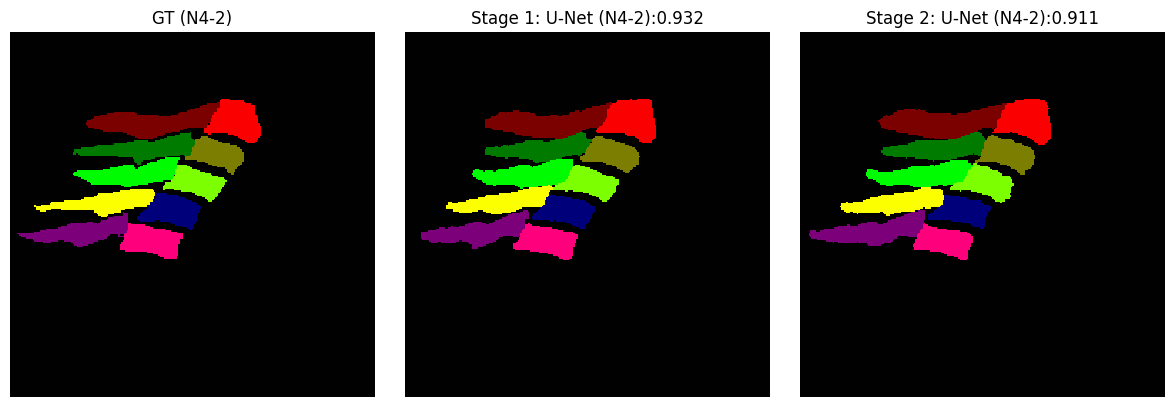

[ WARN:0@26587.026] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.026] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.026] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.027] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-4.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.027] global loadsave.cpp:248 findDecoder imread_('/home/eric/Document

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-3.png
image: N4-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-4.png
image: N4-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-5.png
Count1 =  [58811, 1130, 693, 769, 509, 671, 549, 601, 525, 734, 544]
Count2 =  [58827, 1083, 718, 710, 512, 665, 512, 621, 483, 842, 563]
Count3 =  [58256, 1035, 655, 696, 487, 614, 493, 555, 468, 592, 516]
Dice =  [0.9904282629762492, 0.9353818346136467, 0.9284195605953225, 0.9411764705882353, 0.9539666993143977, 0.9191616766467066, 0.

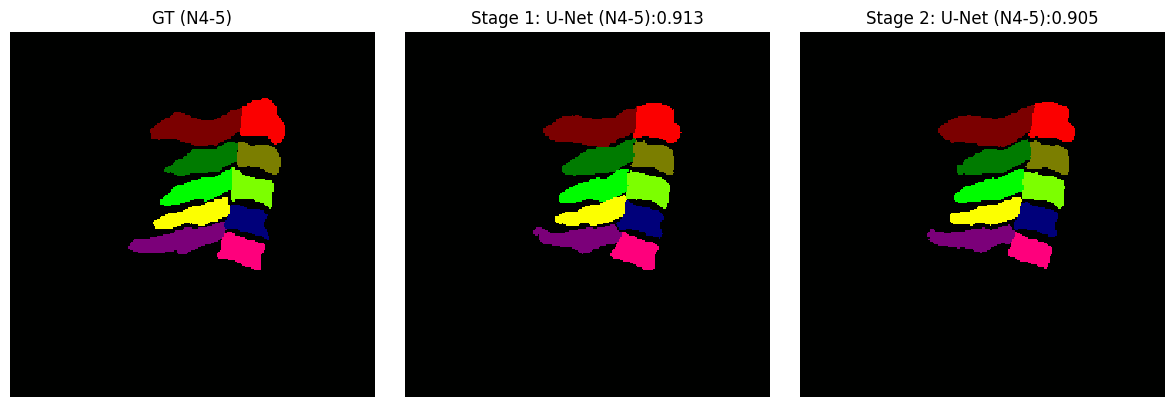

[ WARN:0@26587.208] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.208] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.208] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.210] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-7.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.210] global loadsave.cpp:248 findDecoder imread_('/home/eric/Document

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-6.png
image: N4-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-7.png
image: N4-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-8.png
image: N4-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
image: N4-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-Correctio

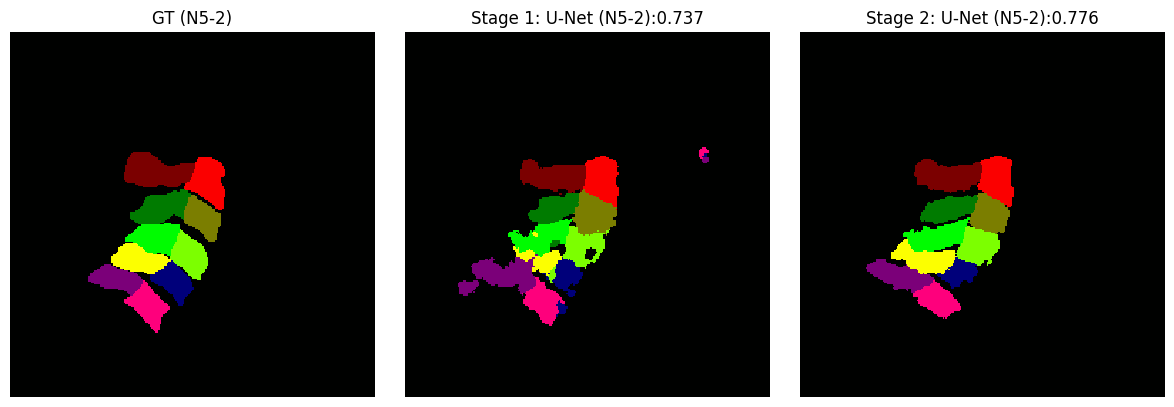

[ WARN:0@26587.393] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-3.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.393] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N5-3.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.393] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-3.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-3.png
image: N5-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-4.png
Count1 =  [59230, 844, 471, 568, 405, 825, 580, 829, 528, 799, 457]
Count2 =  [60256, 848, 482, 567, 360, 598, 382, 536, 392, 686, 429]
Count3 =  [58701, 788, 421, 527, 315, 506, 317, 202, 132, 4, 0]
Dice =  [0.9825586261151934, 0.9314420803782506, 0.8835257082896117, 0.9286343612334802, 0.8235294117647058, 0.7111735769501054, 0.659043659043659, 0.295970695970696, 0.28695652173913044, 0.0053872053872053875, 0.0, 0.5525663220756845]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N5-4.png


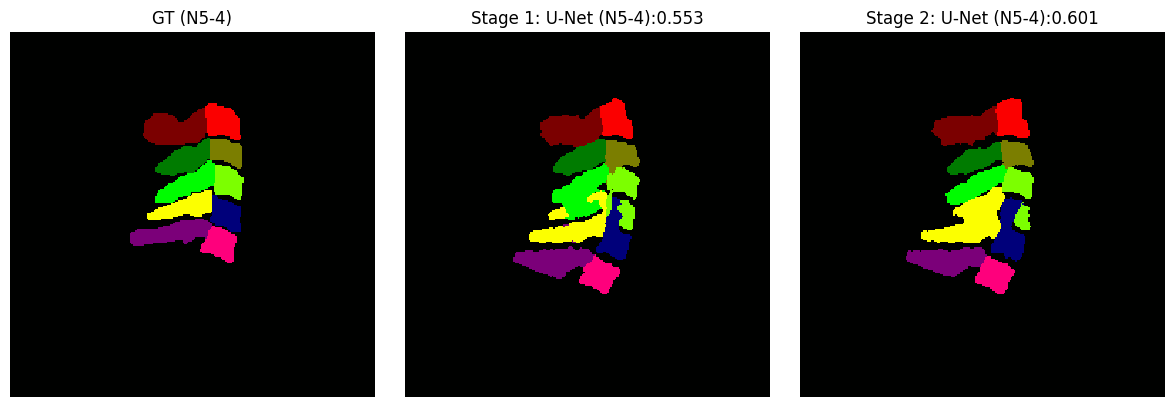

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-5.png
image: N5-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png
image: N5-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png
image: N5-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-8.png
image: N5-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20251202-Correctio

[ WARN:0@26587.570] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-5.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.570] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet2/crf/N5-5.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.570] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-5.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.571] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20251202-CorrectionNetworkTestv2.2/fold4/unet1/crf/N5-6.png'): can't open/read file: check file path/integrity
[ WARN:0@26587.571] global loadsave.cpp:248 findDecoder imread_('/home/eric/Document

In [25]:

fold = "fold4"

imgs_name = []
for i in range(5):
    for j in range (10):
        imgs_name.append(f"N{i+1}-{j+1}")

searchdir =  searchdir + "/" + fold + "/unet1/crf"
searchdir2 = searchdir2 + "/"  + fold + "/unet2/crf"
    

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for img_name in imgs_name:
    try:
        img_label = cv2.imread(labeled_dir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(searchdir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(searchdir2 + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        
        
        Dice1 = cal_DiceMulitple(searchdir, [img_name])
        df = pd.DataFrame(Dice1)
        df = df.T

        Dice2 = cal_DiceMulitple(searchdir2, [img_name])
        df = pd.DataFrame(Dice2)
        df = df.T
        
        
        

        fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches
        colors = ['#000100', '#7B0000', '#FB0000', '#007B00', '#7B7E00', '#00FC00', '#7CFF00', '#FCFF00', '#00007A', '#7B0079', '#FE007C']
        cmap = ListedColormap(colors[:11])
        
        # 1. Plot the first image
        axes[0].imshow(img_label, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[0].set_title(f'GT ({img_name})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 2. Plot the first image
        axes[1].imshow(img, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[1].set_title(f'Stage 1: U-Net ({img_name}):{np.round(Dice1[-1], 3)}') # Caption for the first plot
        axes[1].axis('off') # Hide axis

        # 3. Plot the second image
        axes[2].imshow(img2, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[2].set_title(f'Stage 2: U-Net ({img_name}):{np.round(Dice2[-1], 3)}') # Caption for the second plot
        axes[2].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
    except:
        print(f"image: {img_name} not found")